In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.metrics import mean_squared_error

## Time Series analysis on wheat prices

In [4]:
df=pd.read_csv('C:/Users/DHRUVIL/OneDrive/Stratsntools/Python Directory/BIIB_data.csv')
#Reading the data. index_col=0 sets the 0th column as the index

In [6]:
df.shape #1259 rows and 6 column

(1259, 7)

In [7]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,163.57,165.80,162.325,164.44,1163956,BIIB
1,2013-02-11,164.51,165.28,163.055,163.96,1036172,BIIB
2,2013-02-12,163.98,165.94,163.320,165.45,1079829,BIIB
3,2013-02-13,163.39,167.29,163.340,165.91,1378081,BIIB
4,2013-02-14,165.67,165.77,163.450,164.59,1203561,BIIB


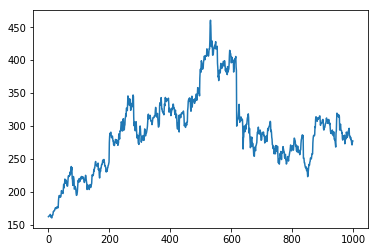

In [34]:
df_stocks=df.iloc[:1000,3] #first 300 points ere used to fit the model. Next 70 are used as validation set
df_holdout=df.iloc[1000:,3] #Validation or holdout set
df_stocks.plot()

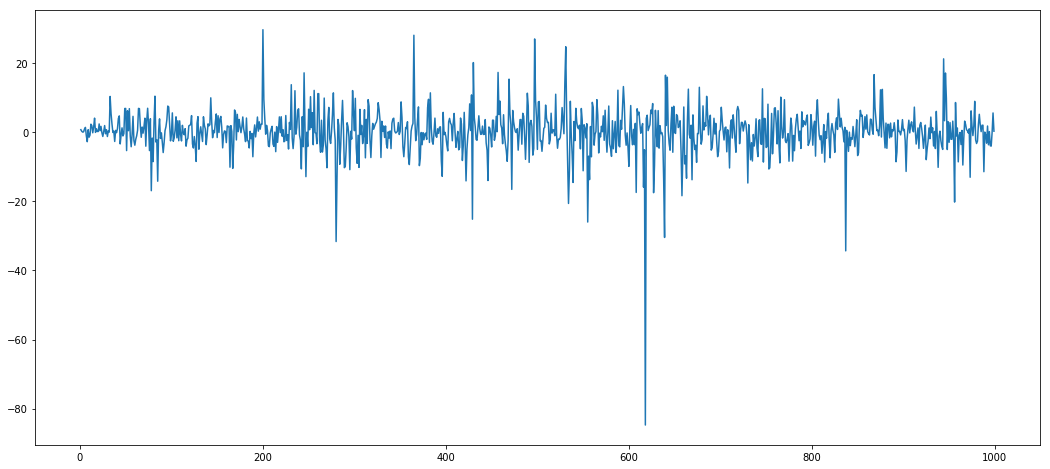

In [41]:
df_stocks_diff=df_stocks-df_stocks.shift() #To remove the trend and achieve stationarity, we plot the differenced time series
df_stocks_diff.plot() 

In [42]:
df_stocks_diff.head()

0      NaN
1    0.730
2    0.265
3    0.020
4    0.110
Name: low, dtype: float64

In [43]:
df_stocks_diff.iloc[0]=df_stocks.iloc[0] #First value of the differenced time series (NaN) 
#is replaced with the first value of the original time series.

In [44]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_stocks, nlags=10,) #Autocorrelation plot for 10 lags
lag_pacf = pacf(df_stocks, nlags=10, method='ols') #Partial autocorrelation plot for 10 lags

## ACF and PACF plots

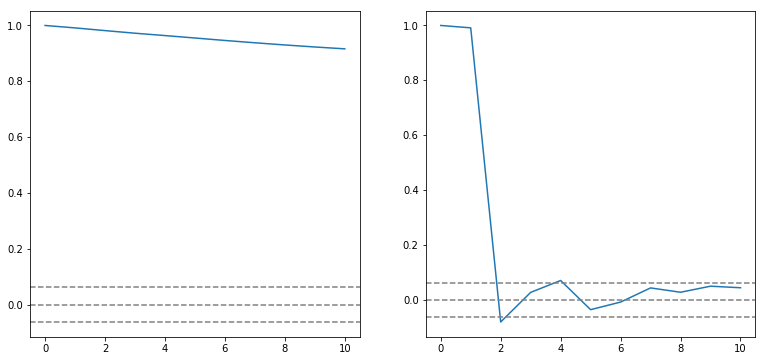

In [45]:
plt.figure(figsize=(13,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_stocks_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_stocks_diff)),linestyle='--',color='gray')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_stocks_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_stocks_diff)),linestyle='--',color='gray')
#At lag one for acf, we have value which just crosses the significance threshold indicating one MA term
#At lag one for pacf, we have value which just crosses the significance threshold indicating one AR term

## Fitting an ARIMA model

In [64]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_stocks,order=(2,1,1))
results_AR=model.fit(disp=-1)

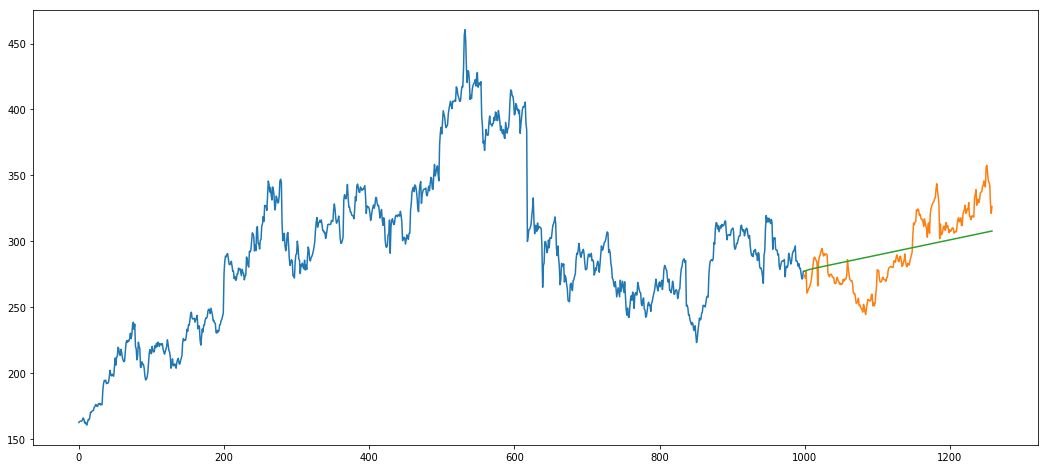

In [65]:
predictions_AR=results_AR.predict(start=len(df_stocks_diff),end=len(df_stocks_diff)+258)
predictions_AR.iloc[0]=predictions_AR.iloc[0]+df_stocks.iloc[998]
predictions_AR=predictions_AR.cumsum()
predictions_AR.head()

predictions_AR.index=df_holdout.index



plt.plot(df_stocks)
plt.plot(df_holdout)
plt.plot(predictions_AR)

## Results of AR model

In [66]:
error=mean_squared_error(df_holdout,predictions_AR)
print(error)

439.3863161406099


## Machine Learning and Deep Learning methods

In [67]:
df=pd.read_csv('C:/Users/DHRUVIL/OneDrive/Stratsntools/Python Directory/BIIB_data.csv')

In [68]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,163.57,165.80,162.325,164.44,1163956,BIIB
1,2013-02-11,164.51,165.28,163.055,163.96,1036172,BIIB
2,2013-02-12,163.98,165.94,163.320,165.45,1079829,BIIB
3,2013-02-13,163.39,167.29,163.340,165.91,1378081,BIIB
4,2013-02-14,165.67,165.77,163.450,164.59,1203561,BIIB


In [69]:
from datetime import datetime
def components(x): #To extract dat, month and year as features
    date=datetime.strptime(x,'%Y-%m-%d')
    return (date.day,date.month,date.year) 
df['Day']=df['date'].apply(lambda x:components(x)[0])
df['Month']=df['date'].apply(lambda x:components(x)[1])
df['Year']=df['date'].apply(lambda x:components(x)[2])

In [70]:
df.head()

,date,open,high,low,close,volume,Name,Day,Month,Year
0,2013-02-08,163.57,165.80,162.325,164.44,1163956,BIIB,8,2,2013
1,2013-02-11,164.51,165.28,163.055,163.96,1036172,BIIB,11,2,2013
2,2013-02-12,163.98,165.94,163.320,165.45,1079829,BIIB,12,2,2013
3,2013-02-13,163.39,167.29,163.340,165.91,1378081,BIIB,13,2,2013
4,2013-02-14,165.67,165.77,163.450,164.59,1203561,BIIB,14,2,2013


## Preparing x and y variables

In [71]:
Y=df['close']
df=df.drop(['Name','date','close','open','volume','high','low'],1)

In [72]:
df.head()

,Day,Month,Year
0,8,2,2013
1,11,2,2013
2,12,2,2013
3,13,2,2013
4,14,2,2013


In [73]:
df.shape

(1259, 3)

In [74]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

C:\Users\DHRUVIL\Anaconda_3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [75]:
scale=MinMaxScaler()
df=scale.fit_transform(df) #Scaling the features in the data

In [76]:
pd.DataFrame(df).head()

,0,1,2
0,0.233333,0.090909,0.0
1,0.333333,0.090909,0.0
2,0.366667,0.090909,0.0
3,0.400000,0.090909,0.0
4,0.433333,0.090909,0.0


In [77]:
df_train=df[:1100,:] #Separating train and test/validation sets
y_train=np.array(Y.iloc[:1100])
df_test=df[1100:,:]
y_test=np.array(Y.iloc[1100:])

In [78]:
df_train.shape, df_test.shape

((1100, 3), (159, 3))

In [79]:
model=Sequential()
model.add(LSTM(250,input_shape=(df_train.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [80]:
df_train=df_train.reshape((df_train.shape[0],df_train.shape[1],1)) #For inputs to LSTM, if you have x time steps 
#with y features, reshape your data to (x,y,1)
df_test=df_test.reshape((df_test.shape[0],df_test.shape[1],1))

In [81]:
model.fit(df_train,y_train,epochs=300,shuffle=False)

Epoch 1/300
1100/1100 [==============================] - 3s 3ms/step - loss: 88129.4794
Epoch 2/300
1100/1100 [==============================] - 2s 1ms/step - loss: 75766.8363
Epoch 3/300
1100/1100 [==============================] - 2s 1ms/step - loss: 65650.1568
Epoch 4/300
1100/1100 [==============================] - 1s 1ms/step - loss: 60077.4888
Epoch 5/300
1100/1100 [==============================] - 2s 1ms/step - loss: 55186.9833
Epoch 6/300
1100/1100 [==============================] - 2s 1ms/step - loss: 50750.0983
Epoch 7/300
1100/1100 [==============================] - 2s 1ms/step - loss: 46761.3476
Epoch 8/300
1100/1100 [==============================] - 1s 1ms/step - loss: 43181.6393
Epoch 9/300
1100/1100 [==============================] - 1s 1ms/step - loss: 39922.5580
Epoch 10/300
1100/1100 [==============================] - 1s 1ms/step - loss: 36930.6144
Epoch 11/300
1100/1100 [==============================] - 1s 1ms/step - loss: 34169.7241
Epoch 12/300
1100/1100 [======

1100/1100 [==============================] - 1s 1ms/step - loss: 3232.6662A: 0s - loss: 7497.92 - ETA:  - ETA: 0s - los
Epoch 93/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.9217
Epoch 94/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.7391: 0s - loss: 3398.
Epoch 95/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.6596
Epoch 96/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.7169
Epoch 97/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.7930
Epoch 98/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.7392
Epoch 99/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.8195
Epoch 100/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3214.9320
Epoch 101/300
1100/1100 [==============================] - 2s 1ms/step - loss: 3215.0603
Epoch 102/300
1100/1100 [==============================] - 2s 1ms/st

Epoch 182/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3225.2962
Epoch 183/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3259.7562: 0s - loss: 3559.
Epoch 184/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3228.1629
Epoch 185/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3226.0773
Epoch 186/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3224.5978: 0s - loss: 3515.89 - ETA: 0s - loss: 3316.67
Epoch 187/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3223.5314
Epoch 188/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3222.7625
Epoch 189/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3222.2098
Epoch 190/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.8139
Epoch 191/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.5327
Epoch 192/300
1100/1100 [=====================

1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2377
Epoch 272/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2401
Epoch 273/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2424
Epoch 274/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2447
Epoch 275/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2466
Epoch 276/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2497
Epoch 277/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2521
Epoch 278/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2535
Epoch 279/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2556
Epoch 280/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2584
Epoch 281/300
1100/1100 [==============================] - 1s 1ms/step - loss: 3221.2598
Epoch 282/300
1100/1100 [==========

In [82]:
predictions_lstm=model.predict(df_test)
train_values=pd.DataFrame(y_train,index=range(1100))
holdout_predictions=pd.DataFrame(predictions_lstm,index=range(1100,1100+len(predictions_lstm)))
holdout_values=pd.DataFrame(y_test,index=range(1100,1100+len(predictions_lstm)))

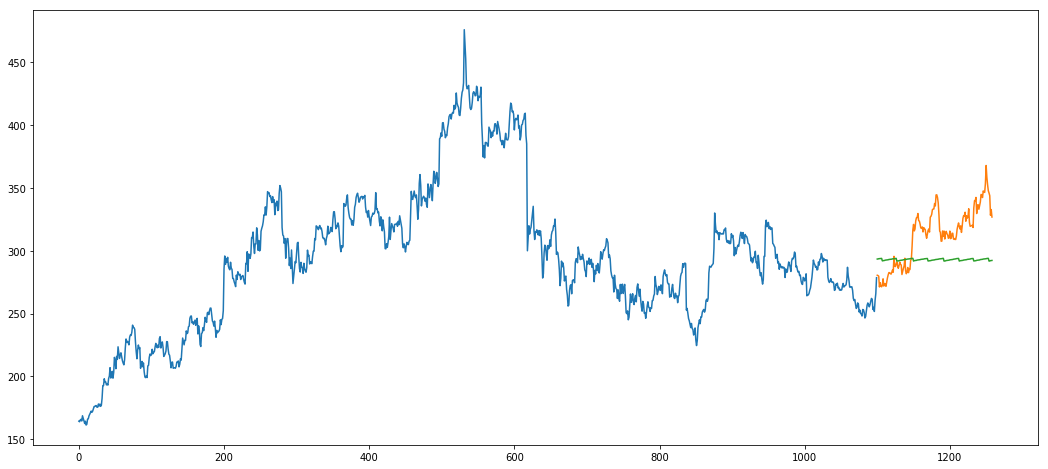

In [84]:
plt.plot(train_values)
plt.plot(holdout_values)
plt.plot(holdout_predictions)

In [87]:
error=mean_squared_error(holdout_values,predictions_lstm)
print(error)

895.063155743126


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_dict={'n_estimators':[1,5,10]}
rf=RandomForestRegressor()
cv=GridSearchCV(rf,param_grid=param_dict,scoring='neg_mean_squared_error')
df_train=df[:1100,:]
y_train=np.array(Y.iloc[:1100])
df_test=df[1100:,:]
y_test=np.array(Y.iloc[1100:])

In [89]:
cv.fit(df_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
cv.best_score_

-10452.309521037974

In [91]:
predictions_rf=cv.best_estimator_.predict(df_test)
train_values=pd.DataFrame(y_train,index=range(1100))
holdout_predictions=pd.DataFrame(predictions_rf,index=range(1100,1100+len(predictions_rf)))
holdout_values=pd.DataFrame(y_test,index=range(1100,1100+len(predictions_rf)))

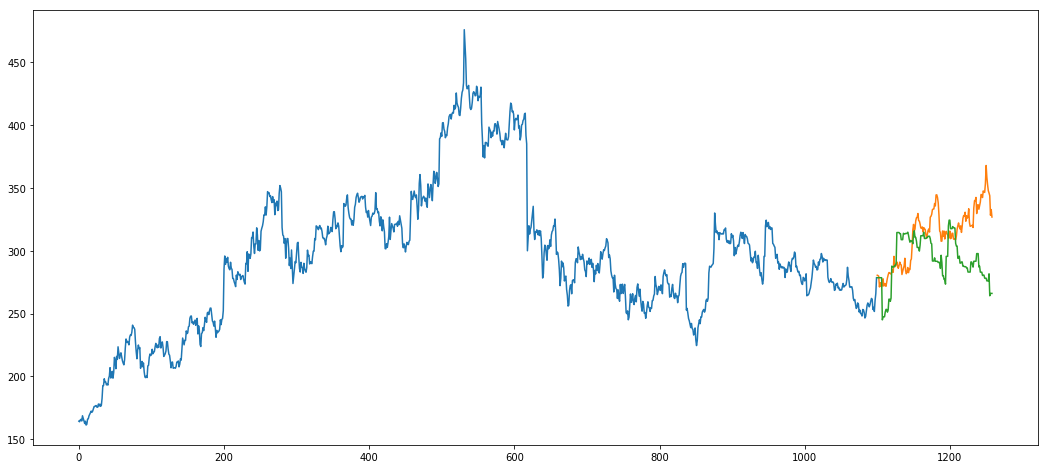

In [92]:
plt.plot(train_values)
plt.plot(holdout_values)
plt.plot(holdout_predictions)

In [95]:
error=mean_squared_error(y_test,predictions_rf)
print(error)

1157.9112949685536
